# How to forecast a Time Series with AutoArima
---

Wouldn't it be nice to know the future? This is the notebook that relates to the blog post on medium. Please check the blog for visualizations and explanations, this notebook is really just for the code :)

* https://github.com/Pierian-Data/AutoArima-Time-Series-Blog 



## Processing the Data

Let's explore the Industrial production of electric and gas utilities in the United States, from the years 1985-2018, with our frequency being Monthly production output.

You can access this data here: https://fred.stlouisfed.org/series/IPG2211A2N

This data measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

In [3]:
%matplotlib inline
import pandas as pd
data = pd.read_csv("Electric_Production.csv",index_col=0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Right now our index is actually just a list of strings that look like a date, we'll want to adjust these to be timestamps, that way our forecasting analysis will be able to interpret these values:

In [4]:
data.index

Index(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
       '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01', '1985-10-01',
       ...
       '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01'],
      dtype='object', name='DATE', length=397)

In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [7]:
data.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

Let's first make sure that the data doesn't have any missing data points:

In [8]:
data[pd.isnull(data['IPG2211A2N'])]

,IPG2211A2N
DATE,


Let's also rename this column since its hard to remember what "IPG2211A2N" code stands for:

In [9]:
data.columns = ['Energy Production']

In [10]:
data.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


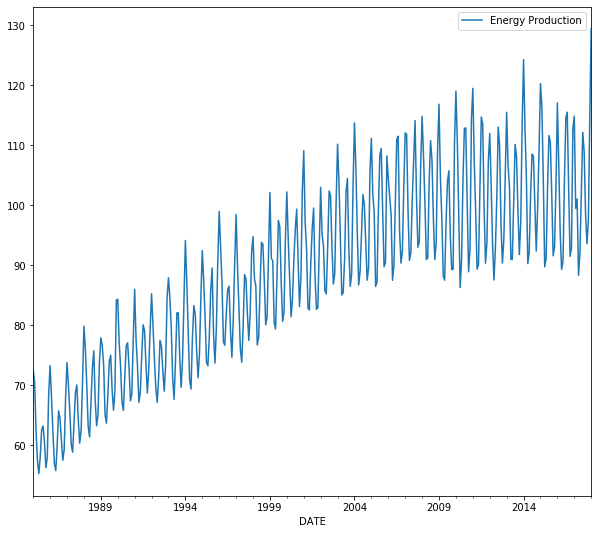

In [11]:
data.plot(figsize=(10,9))

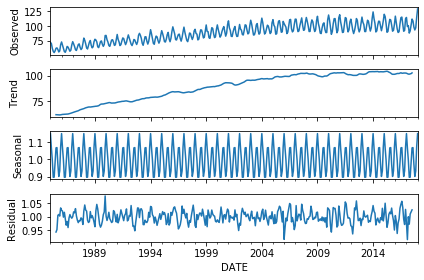

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative').plot()

# AutoArima

---

https://pypi.org/project/pmdarima 

Pmdarima is a statistical Python library with a solitary objective: bring R's `auto.arima` functionality to Python. Pmdarima operates by wrapping `statsmodels.tsa.ARIMA` and `statsmodels.tsa.statespace.SARIMAX` into one estimator class and creating a more user-friendly estimator interface for programmers familiar with `scikit-learn`.

In [13]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

**he AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [14]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True, 
                           suppress_warnings=True, n_jobs=-1) 

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:304: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1782.527, BIC=1802.280, Fit time=1.640 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2012.117, BIC=2020.018, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1942.041, BIC=1957.844, Fit time=0.344 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1837.289, BIC=1853.091, Fit time=0.525 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2010.162, BIC=2014.112, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1920.884, BIC=1936.687, Fit time=0.613 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1783.870, BIC=1807.574, Fit time=2.203 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at 

In [15]:
stepwise_model.aic()

1770.2126880429892

## Train Test Split

In [16]:
data.head()

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
Energy Production    397 non-null float64
dtypes: float64(1)
memory usage: 6.2 KB


We'll train on 20 years of data, from the years 1985-2015 and test our forcast on the years after that and compare it to the real data.

In [32]:
train = data.loc['1985-01-01':'2014-12-01']

In [33]:
train.tail()

,Energy Production
DATE,
2014-08-01,108.1940
2014-09-01,100.4172
2014-10-01,92.3837
2014-11-01,99.7033
2014-12-01,109.3477


In [34]:
test = data.loc['2015-01-01':]

In [35]:
test.head()

,Energy Production
DATE,
2015-01-01,120.2696
2015-02-01,116.3788
2015-03-01,104.4706
2015-04-01,89.7461
2015-05-01,91.0930


In [36]:
test.tail()

,Energy Production
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [37]:
len(test)

37

In [38]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [39]:
future_forecast = stepwise_model.predict(n_periods=37)

In [40]:
future_forecast

array([118.16935692, 108.79917037, 100.4921736 ,  89.87465625,
        92.30239899, 102.74524959, 111.78789559, 110.87669389,
        99.84054395,  91.90183723,  96.49297852, 109.65703375,
       117.58901928, 108.26125005, 100.53171975,  90.27655104,
        92.3403745 , 102.65466903, 112.22122959, 110.92517482,
        99.7039449 ,  91.89807649,  96.21636728, 110.40261329,
       118.79563265, 109.09576436, 101.49713118,  90.44630119,
        92.34974313, 102.49655216, 111.59275363, 110.3738098 ,
        99.84188529,  92.0220247 ,  96.90363889, 110.41532851,
       119.04311335])

In [41]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

In [42]:
future_forecast.head()

,Prediction
DATE,
2015-01-01,118.169357
2015-02-01,108.799170
2015-03-01,100.492174
2015-04-01,89.874656
2015-05-01,92.302399


In [43]:
test.head()

,Energy Production
DATE,
2015-01-01,120.2696
2015-02-01,116.3788
2015-03-01,104.4706
2015-04-01,89.7461
2015-05-01,91.0930


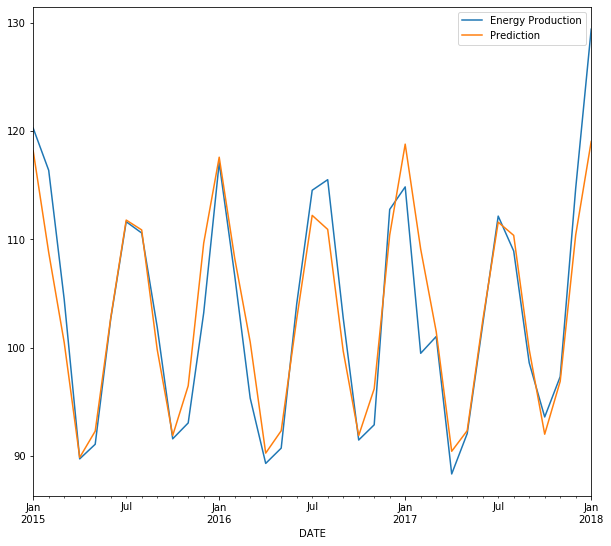

In [44]:
pd.concat([test,future_forecast],axis=1).plot(figsize=(10,9))

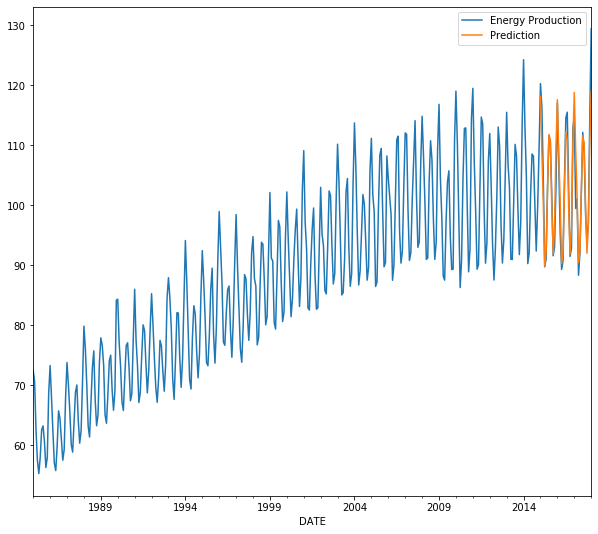

In [45]:
pd.concat([data,future_forecast],axis=1).plot(figsize=(10,9))